# Image Classification 
In this Notebook, I (Mr Rehan) will make model using Neural nets DNN using TF and we will improve model using Transfer Function using VGG16 : 


In [6]:
import os
import math
import random
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
# download the data from kaggle: 
# https://www.kaggle.com/ihelon/lego-minifigures-tensorflow-tutorial
BASE_DIR = 'E:/tensorflow-Learning/starwars/'
names = ["YODA", "LUKE SKYWALKER", "R2-D2", "MACE WINDU", "GENERAL GRIEVOUS"]

tf.random.set_seed(1)

In [20]:
if not os.path.isdir(BASE_DIR + 'train/'):
    for name in names:
        os.makedirs(BASE_DIR + 'train/' + name)
        os.makedirs(BASE_DIR + 'val/' + name)
        os.makedirs(BASE_DIR + 'test/' + name)

In [21]:
orig_folders = ["0001/", "0002/", "0003/", "0004/", "0005/"]
for folder_idx, folder in enumerate(orig_folders):
    files = os.listdir(BASE_DIR + folder)
    number_of_images = len([name for name in files])
    n_train = int((number_of_images * 0.6) + 0.5)
    n_valid = int((number_of_images*0.25) + 0.5)
    n_test = number_of_images - n_train - n_valid
    print(number_of_images, n_train, n_valid, n_test)
    for idx, file in enumerate(files):
        file_name = BASE_DIR + folder + file
        if idx < n_train:
            shutil.move(file_name, BASE_DIR + "train/" + names[folder_idx])
        elif idx < n_train + n_valid:
            shutil.move(file_name, BASE_DIR + "val/" + names[folder_idx])
        else:
            shutil.move(file_name, BASE_DIR + "test/" + names[folder_idx])

12 7 3 2
12 7 3 2
12 7 3 2
13 8 3 2
14 8 4 2


In [44]:
# Generate batches of tensor image data with
# optional real-time data augmentation.

# preprocessing_function
# rescale=1./255 -> [0,1]
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
#    rotation_range=20,
#    horizontal_flip=True,
#    width_shift_range=0.2, height_shift_range=0.2,
#    shear_range=0.2, zoom_range=0.2)

valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batches = train_gen.flow_from_directory(
    'E:/tensorflow-Learning/starwars/train',
    target_size=(256, 256),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names   
)

val_batches = valid_gen.flow_from_directory(
    'E:/tensorflow-Learning/starwars/val',
    target_size=(256, 256),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

test_batches = test_gen.flow_from_directory(
    'E:/tensorflow-Learning/starwars/test',
    target_size=(256, 256),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

Found 37 images belonging to 5 classes.
Found 16 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [45]:
train_batch = train_batches[0]
print(train_batch[0].shape)
print(train_batch[1])
test_batch = test_batches[0]
print(test_batch[0].shape)
print(test_batch[1])

(4, 256, 256, 3)
[3. 0. 4. 1.]
(4, 256, 256, 3)
[0. 0. 1. 1.]


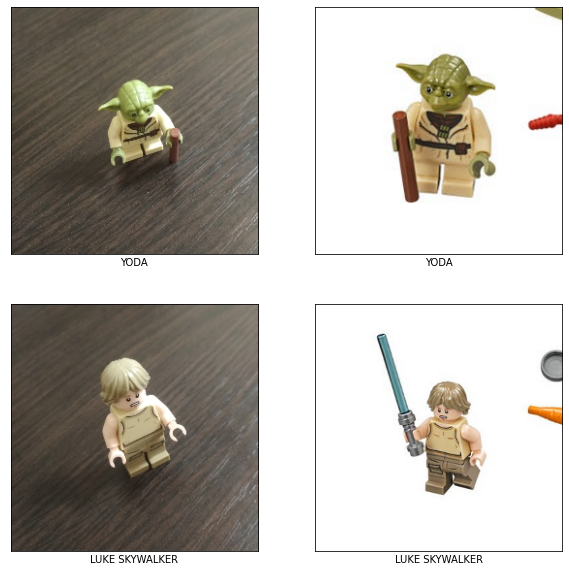

In [46]:
def show(batch, pred_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(batch[0][i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        lbl = names[int(batch[1][i])]
        if pred_labels is not None:
            lbl += "/ Pred:" + names[int(pred_labels[i])]
        plt.xlabel(lbl)
    plt.show()

show(test_batch)

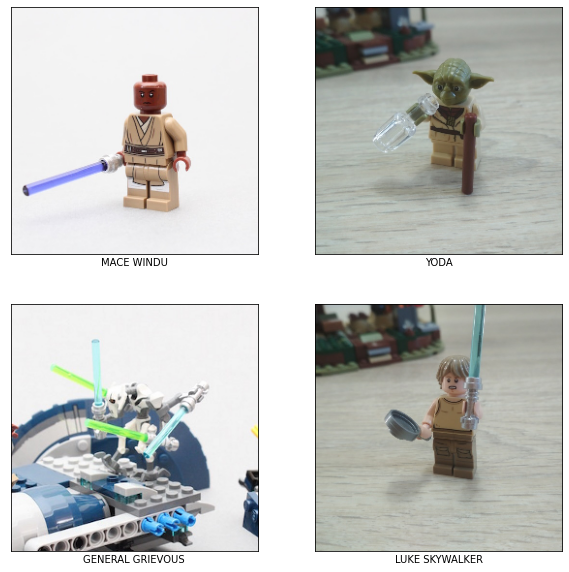

In [47]:
show(train_batch)

In [50]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(256, 256,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                15745088  
_________________________________________________________________
dense_6 (Dense)              (None, 5)                

In [51]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [52]:
# training
epochs = 30

# callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)

history = model.fit(train_batches, validation_data=val_batches,
                    callbacks=[early_stopping],
                      epochs=epochs, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 4 steps
Epoch 1/30
10/10 - 19s - loss: 7.5454 - accuracy: 0.1892 - val_loss: 1.6036 - val_accuracy: 0.1875
Epoch 2/30
10/10 - 4s - loss: 1.5880 - accuracy: 0.3243 - val_loss: 1.5545 - val_accuracy: 0.2500
Epoch 3/30
10/10 - 3s - loss: 1.5156 - accuracy: 0.4595 - val_loss: 1.4503 - val_accuracy: 0.5000
Epoch 4/30
10/10 - 3s - loss: 0.9882 - accuracy: 0.7297 - val_loss: 1.4432 - val_accuracy: 0.3750
Epoch 5/30
10/10 - 3s - loss: 0.5222 - accuracy: 0.8919 - val_loss: 1.0446 - val_accuracy: 0.5625
Epoch 6/30
10/10 - 3s - loss: 0.3255 - accuracy: 0.9459 - val_loss: 0.9514 - val_accuracy: 0.6875
Epoch 7/30
10/10 - 3s - loss: 0.1719 - accuracy: 1.0000 - val_loss: 1.0673 - val_accuracy: 0.6875
Epoch 8/30
10/10 - 3s - loss: 0.2396 - accuracy: 0.9189 - val_loss: 3.9262 - val_accuracy: 0.4375
Epoch 9/30
10/10 - 3s - loss: 0.2123 - accuracy: 0.9189 - val_loss: 2.1071 - val_accuracy: 0.6250
Epoch 10/30
10/10 - 3s - l

In [53]:
model.save("lego_model.h5")

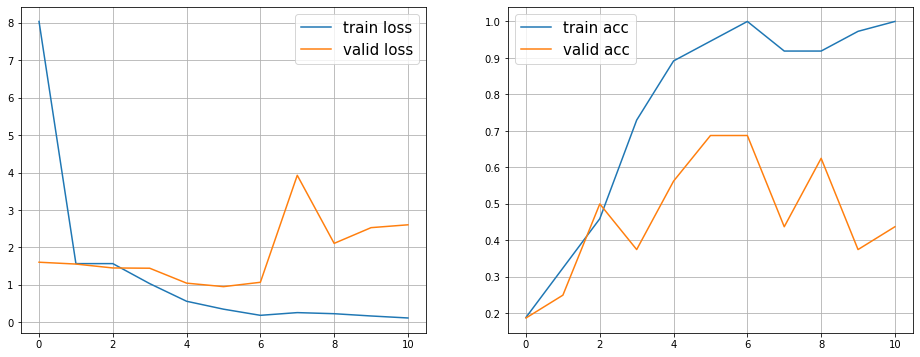

In [54]:
# plot loss and acc
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.grid()
plt.legend(fontsize=15)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='valid acc')
plt.grid()
plt.legend(fontsize=15);

In [55]:
model.evaluate(test_batches, verbose=2)

  ...
    to  
  ['...']
3/3 - 0s - loss: 0.4157 - accuracy: 0.8000


[0.41565725185985986, 0.8]

In [56]:
predictions = model.predict(test_batches)
predictions = tf.nn.softmax(predictions)
labels = np.argmax(predictions, axis=1)

print(test_batches[0][1])
print(labels[0:4])

[0. 0. 1. 1.]
[0 0 3 3]


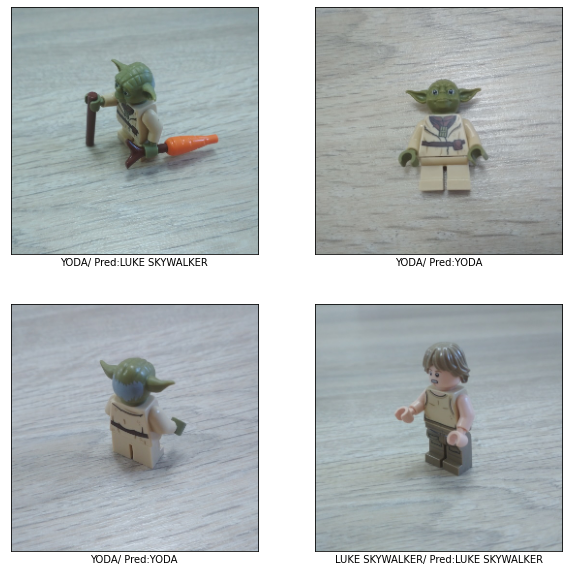

In [34]:
show(test_batches[0], labels[0:4])

We can see diff b/w Test accuracy and model accuracy, which shows that we need improvement as model is underfit due to small data.

# Transfer Learning

In [59]:
vgg_model = tf.keras.applications.vgg16.VGG16()
print(type(vgg_model))
vgg_model.summary()


<class 'tensorflow.python.keras.engine.training.Model'>
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block

In [60]:
model = keras.models.Sequential()
for layer in vgg_model.layers[0:-1]:
    model.add(layer)

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [62]:
# set trainable=False for all layers
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [63]:
# add a last classification layer for our use case with 5 classes
model.add(layers.Dense(5))

In [64]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [65]:
preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [66]:
train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
valid_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = train_gen.flow_from_directory(
    'E:/tensorflow-Learning/starwars/train',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names   
)

val_batches = valid_gen.flow_from_directory(
    'E:/tensorflow-Learning/starwars/val',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names
)

test_batches = test_gen.flow_from_directory(
    'E:/tensorflow-Learning/starwars/test',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

Found 37 images belonging to 5 classes.
Found 16 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [67]:
epochs = 30

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)

model.fit(train_batches, validation_data=val_batches,
          callbacks=[early_stopping],
          epochs=epochs, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 4 steps
Epoch 1/30
10/10 - 16s - loss: 2.2213 - accuracy: 0.4324 - val_loss: 0.9795 - val_accuracy: 0.6250
Epoch 2/30
10/10 - 10s - loss: 0.2551 - accuracy: 0.8919 - val_loss: 0.7443 - val_accuracy: 0.9375
Epoch 3/30
10/10 - 11s - loss: 0.0263 - accuracy: 1.0000 - val_loss: 0.6748 - val_accuracy: 0.9375
Epoch 4/30
10/10 - 11s - loss: 0.0831 - accuracy: 0.9459 - val_loss: 0.6333 - val_accuracy: 0.9375
Epoch 5/30
10/10 - 11s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.6661 - val_accuracy: 0.8750
Epoch 6/30
10/10 - 11s - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.6755 - val_accuracy: 0.8750
Epoch 7/30
10/10 - 11s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.6418 - val_accuracy: 0.8750
Epoch 8/30
10/10 - 11s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.6079 - val_accuracy: 0.8750
Epoch 9/30
10/10 - 10s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.5888 - val_accuracy: 0.8750
Epoch 10/30
10/10 

In [68]:
model.evaluate(test_batches, verbose=2)

  ...
    to  
  ['...']
3/3 - 2s - loss: 0.1958 - accuracy: 0.9000


[0.19575162510833857, 0.9]

In [69]:
predictions = model.predict(test_batches)
predictions = tf.nn.softmax(predictions)
labels = np.argmax(predictions, axis=1)

print(test_batches[0][1])
print(labels[0:4])

[0. 0. 1. 1.]
[0 0 1 3]


If we compare Accuracy of both models, we will see that using Pre-trained model it performs better.